In [55]:
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D

from matplotlib import pyplot as plt

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


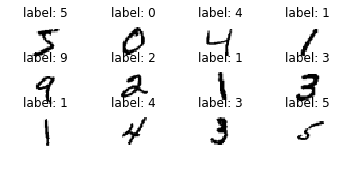

In [57]:
images_and_labels = zip(X_train[:12],  y_train[:12])
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'label: {label}')

In [58]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')

image_shape = X_train[0].shape

N = X_train.shape[0]

print(X_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000,)


In [59]:
y_hot = np.zeros((X_train.shape[0], 10))
y_hot[range(y_hot.shape[0]), y_train] = 1
y_train = y_hot

y_hot = np.zeros((X_test.shape[0], 10))
y_hot[range(y_hot.shape[0]), y_test] = 1
y_test = y_hot

In [77]:
model = Sequential()

model.add(Conv2D(2, 3, padding="same", input_shape=image_shape))

model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 2)         20        
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 2)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                15690     
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 15,710
Trainable params: 15,710
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train, batch_size=200, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 3.1036 - acc: 0.7807
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 1.0869 - acc: 0.9005
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.4643 - acc: 0.9142
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2463 - acc: 0.9363
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2023 - acc: 0.9447
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1816 - acc: 0.9478
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1689 - acc: 0.9517
Epoch 8/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1585 - acc: 0.9541
Epoch 9/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1538 - acc: 0.9547
Epoch 10/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1464 - acc: 0.

In [83]:
results = model.evaluate(X_test, y_test)

print(model.metrics_names)
print(results)

10000/10000 [==============================] - 1s 66us/step
['loss', 'acc']
[0.20983315477594733, 0.9441]
